In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
#loading the dataset
data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Fundamentals of Data Mining\\Coding\\news.csv")
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
#Viewing information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
#Checking for null values
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
#Calculating the number of rows and columns
print("There are {} rows and {} columns.".format(data.shape[0],data.shape[1]))

There are 6335 rows and 4 columns.


In [6]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
#Dropping unimportant columns
data = data.drop(['Unnamed: 0'], axis=1)
data

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
#how much Real news and how much Fake news was there in the dataset
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

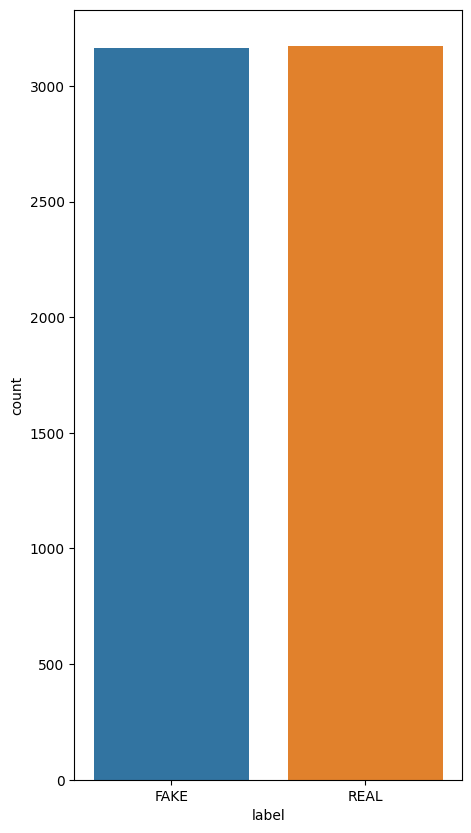

In [9]:
plt.figure(figsize=(5,10))
sns.countplot(x='label',data=data)

In [10]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [11]:
vect = CountVectorizer(stop_words="english",max_features=1000)

In [12]:
x1 = vect.fit_transform(x[:,0]).todense()
x2 = vect.fit_transform(x[:,1]).todense()
x_mat = np.hstack((x1,x2))
x_mat

matrix([[0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x_mat,y,random_state=1000)

In [14]:
#Building the model
model = DecisionTreeClassifier(criterion="entropy")

In [15]:
#Training the model
model.fit(x_train,y_train)

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


DecisionTreeClassifier(criterion='entropy')

In [16]:
#Predicting the model
y_pred = model.predict(x_test)
y_pred

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

In [17]:
#Finding the accuracy of the model
accuracy = accuracy_score(y_pred,y_test) * 100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 80.05


In [18]:
confusion_matrix(y_pred,y_test)

array([[636, 171],
       [145, 632]], dtype=int64)